In [8]:
import numpy as np
import matplotlib.pyplot as plt
def CampoE(A):
  Ny = A.shape[1]
  for y in range(1,Ny-1):
    for x in range(1,Ny-1):
      Ex[y,x] = -(A[y,x+1]-A[y,x])
      Ey[y,x] = -(A[y+1,x]-A[y,x])
  return Ex,Ey
def Cond_borde(V):
  Nx = V.shape[1]
  Ny = V.shape[0]
  V[1*Ny//32,1*Ny//8:7*Ny//8]=10
  V[30*Ny//32,1*Ny//8:7*Ny//8]=-10
  V[13*Ny//32:19*Ny//32, 13*Nx//32:19*Nx//32]=5
  return V
def laplace(M,maxsteps):
  iter = 0
  Nx = M.shape[1]
  Ny = M.shape[0]
  while iter < maxsteps:
    Atemp = M.copy()
    for y in range(0,Ny):
      for x in range(0,Nx):
        if x>0 and y>0 and x<Nx-1 and y<Ny-1:
          M[y,x] = 0.25*(Atemp[y,x+1]+Atemp[y,x-1]+Atemp[y+1,x]+Atemp[y-1,x])
        if x == 0 and y>0 and y<Ny-1:
          M[y,x] = 0.25*(Atemp[y,x+1]+Atemp[y,x]+Atemp[y+1,x]+Atemp[y-1,x])
        if x == Nx-1 and y>0 and y<Ny-1:
          M[y,x] = 0.25*(Atemp[y,x]+Atemp[y,x-1]+Atemp[y+1,x]+Atemp[y-1,x])
        if x>0 and y==0 and x<Nx-1 and y<Ny-1:
          M[y,x] = 0.25*(Atemp[y,x+1]+Atemp[y,x-1]+Atemp[y+1,x]+Atemp[y,x])
        if x>0 and y>0 and x<Nx-1 and y==Ny-1:
          M[y,x] = 0.25*(Atemp[y,x+1]+Atemp[y,x-1]+Atemp[y,x]+Atemp[y-1,x])
        if x==0 and y==0:
          M[y,x] = 0.25*(Atemp[y,x]+Atemp[y,x]+Atemp[y+1,x]+Atemp[y,x+1])
        if x==Nx-1 and y==Ny-1:
          M[y,x] = 0.25*(Atemp[y,x]+Atemp[y,x]+Atemp[y-1,x]+Atemp[y,x-1])
        if x==0 and y==Ny-1:
          M[y,x] = 0.25*(Atemp[y,x]+Atemp[y,x]+Atemp[y-1,x]+Atemp[y,x+1])
        if x==Nx-1 and y==0:
          M[y,x] = 0.25*(Atemp[y,x]+Atemp[y,x]+Atemp[y+1,x]+Atemp[y,x-1])
    M = Cond_borde(M)
    iter +=1
  return M

Nx=2**5
Ny=2**5 
print(Nx,Ny)
ancho = 1
alto = 1
x = np.linspace(-ancho/2,ancho/2,Nx)
y = np.linspace(-alto/2,alto/2,Ny)
V = np.zeros((Nx,Ny))
V = Cond_borde(V)
V = laplace(V,5000)
Ex = np.zeros((Nx,Ny))
Ey = np.zeros((Nx,Ny))
Ex,Ey = CampoE(V)
print('Listo')

32 32
Listo


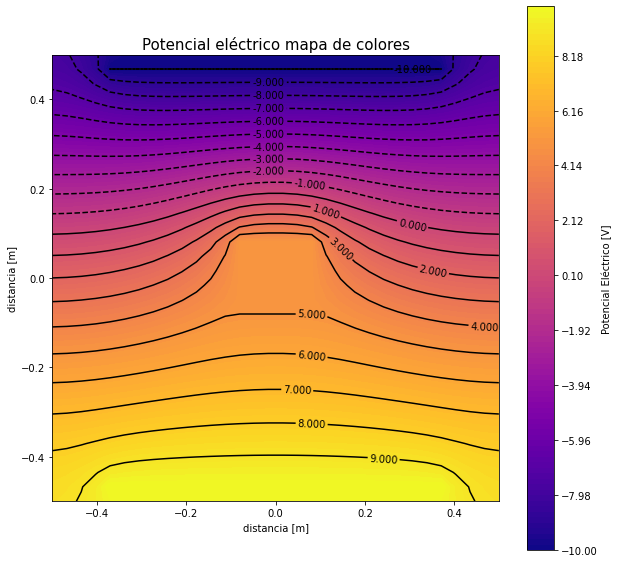

In [9]:
levels = np.linspace(np.min(V), np.max(V), 100)
fig, ax = plt.subplots(1, 1, figsize=(10, 10))
f = plt.contourf(x, y, V,levels, cmap='plasma')
contours = plt.contour(x, y,V,20, colors='black')
plt.clabel(contours, inline=True, fontsize=10)
cbar = plt.colorbar(f)
cbar.ax.set_ylabel('Potencial Eléctrico [V]')
ax.set_aspect('equal')
ax.set_title('Potencial eléctrico mapa de colores',fontsize=15)
ax.set_xlabel('distancia [m]')
ax.set_ylabel('distancia [m]')
plt.show()
